In [4]:
pip install yfinance pandas matplotlib beautifulsoup4 requests


In [6]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index and display first few rows
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO  # <-- Import StringIO

# URL for Tesla financials
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

# Fetch and parse the page
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Extract revenue table
tables = soup.find_all("table")
html_data = str(tables)  # Convert tables to string
tesla_revenue = pd.read_html(StringIO(html_data))[1]  # Wrap in StringIO

# Rename columns and clean data
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)
tesla_revenue.dropna(inplace=True)

# Display first few rows
tesla_revenue.head()


,Date,Revenue
0,2024-12-31,25707.0
1,2024-09-30,25182.0
2,2024-06-30,25500.0
3,2024-03-31,21301.0
4,2023-12-31,25167.0


In [14]:
# Download GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")

# Reset index and display first few rows
gamestop_data.reset_index(inplace=True)
gamestop_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO  # Import StringIO

# URL for GameStop financials
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

# Fetch and parse the page
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Extract revenue table
tables = soup.find_all("table")
html_data = str(tables)  # Convert tables to string
gamestop_revenue = pd.read_html(StringIO(html_data))[1]  # Wrap in StringIO

# Rename columns and clean data
gamestop_revenue.columns = ["Date", "Revenue"]
gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)
gamestop_revenue.dropna(inplace=True)

# Display first few rows
gamestop_revenue.head()


,Date,Revenue
0,2024-10-31,860.0
1,2024-07-31,798.0
2,2024-04-30,882.0
3,2024-01-31,1794.0
4,2023-10-31,1078.0


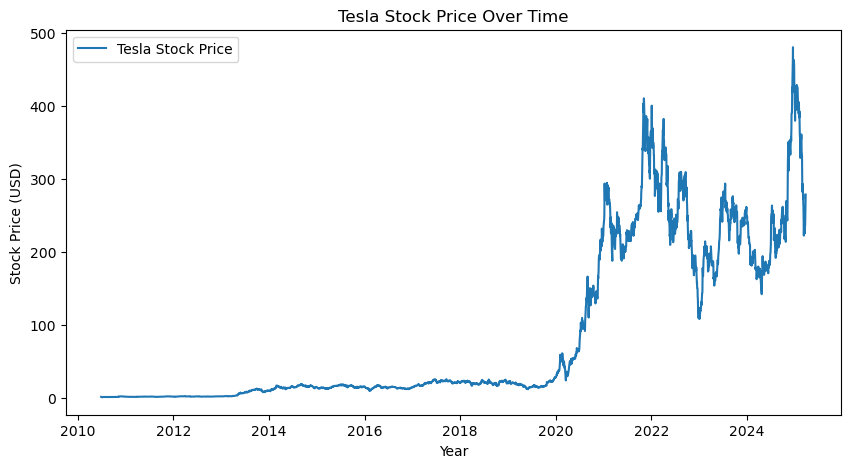

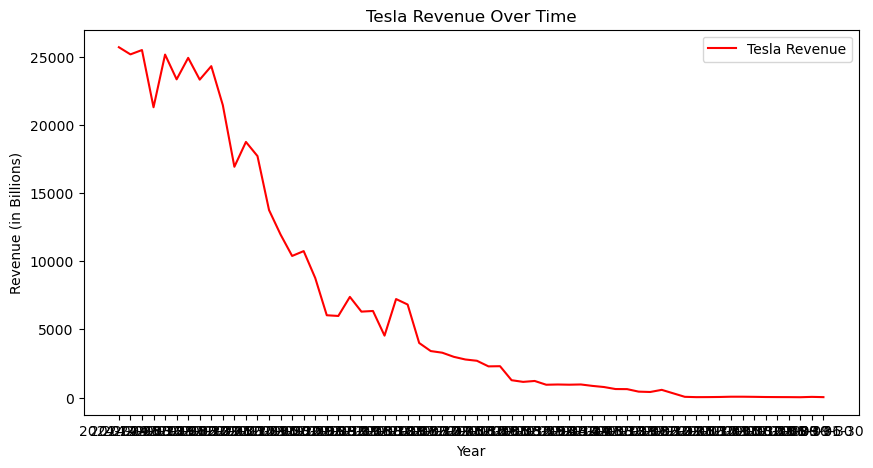

In [20]:
import matplotlib.pyplot as plt

# Tesla Dashboard
plt.figure(figsize=(10,5))
plt.plot(tesla_data["Date"], tesla_data["Close"], label="Tesla Stock Price")
plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price Over Time")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], label="Tesla Revenue", color="red")
plt.xlabel("Year")
plt.ylabel("Revenue (in Billions)")
plt.title("Tesla Revenue Over Time")
plt.legend()
plt.show()


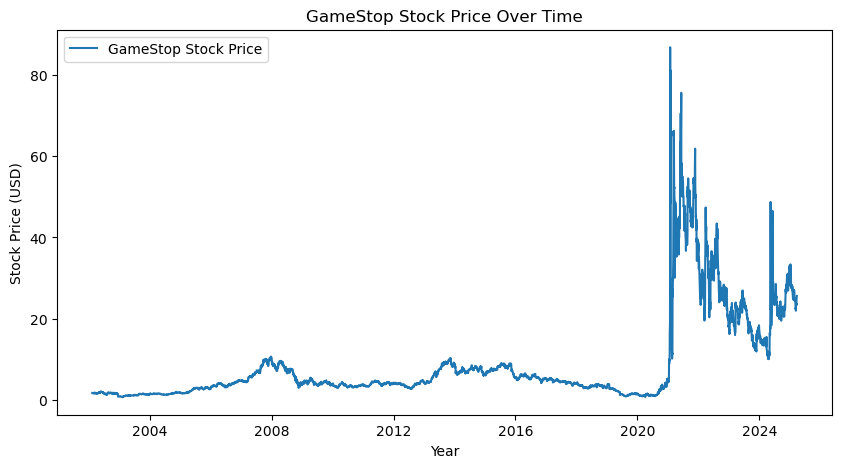

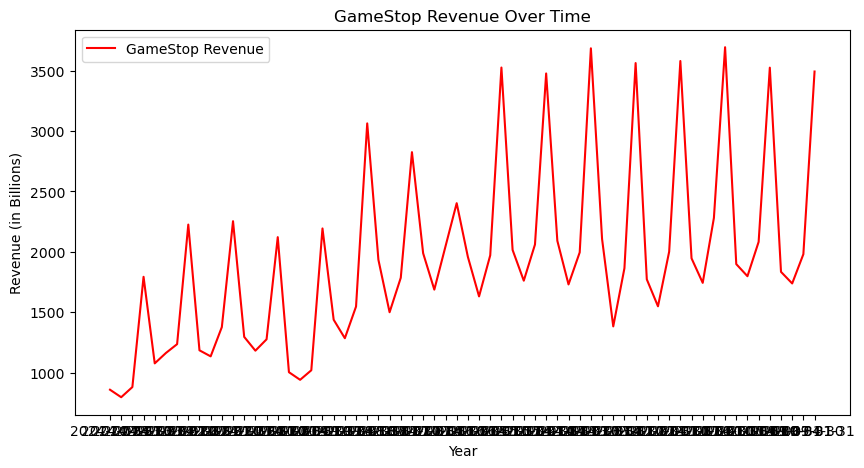

In [22]:
# GameStop Dashboard
plt.figure(figsize=(10,5))
plt.plot(gamestop_data["Date"], gamestop_data["Close"], label="GameStop Stock Price")
plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.title("GameStop Stock Price Over Time")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"], label="GameStop Revenue", color="red")
plt.xlabel("Year")
plt.ylabel("Revenue (in Billions)")
plt.title("GameStop Revenue Over Time")
plt.legend()
plt.show()
